In [ ]:
import os
import numpy as np
from numpy.random import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression

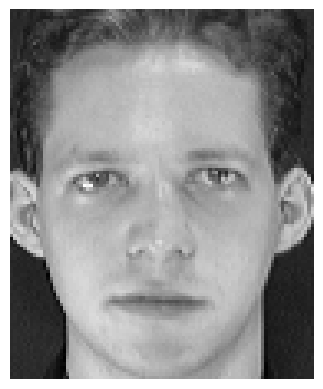

In [2]:
import cv2
import matplotlib.pyplot as plt

def read_pgm(file_path):
    return cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

def show_image(image_data):
    plt.imshow(image_data, cmap='gray')
    plt.axis('off')  # Hide axis labels
    plt.show()

file_path = f'/kaggle/input/facedataset/s1/1.pgm'
image_data = read_pgm(file_path)
show_image(image_data)

In [3]:
image_data.shape

(112, 92)

In [4]:
def get_data(path_data='/kaggle/input/facedataset', test_size=0.2, is_shuffle=True):
    folders = [f's{i+1}' for i in range(40)]
    X, y = [], []

    for i in range(1, 41):
        path = path_data + f'/s{i}'
        files = os.listdir(path)
        num_files = len(files)

        if is_shuffle:
            files = shuffle(files)

        for file in os.listdir(path):
            path = path_data + f'/s{i}/' + file
            image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            pixels = np.reshape(image, [1, image.shape[0] * image.shape[1]])
            pixels = np.asarray(pixels)

            if len(X) == 0:
                X = pixels
            else:
                X = np.vstack([X, pixels])
            y.append(f's{i}')

    return X, np.asarray(y)

In [5]:
X, y = get_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
n_components_pca = 50
pca = PCA(n_components=n_components_pca)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [10]:
predictions = {}

# Euclidean

In [9]:
y_predict = []
for i in range(80):
    min_ = np.argmin(np.sqrt(np.sum((X_train_reduced - X_test_reduced[i])**2,axis=1)))
    y_predict.append(y_train[min_])

In [11]:
predictions['euclidean'] = y_predict

# Logistic Regression

In [12]:
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(X_train_reduced, y_train)
y_predict = lr.predict(X_test_reduced)

Tuning rồi lưu kết quả tuning vào bên dưới

In [15]:
predictions['lr'] = list(y_predict)

In [18]:
import json
with open("/kaggle/working/predict.json", "w") as json_file:
    json.dump(predictions, json_file)